# McDonalds Case Study

<b>Business Problem</b>

McDonald's management needs to determine which market segment(s) to target for their marketing efforts, based on specific criteria such as homogeneity, distinctiveness, size, and alignment with McDonald's strengths. They also want to address the challenge of understanding and potentially changing perceptions in segments that do not currently favor McDonald's.

<b>Collecting Data</b>

The dataset includes responses from 1,453 Australian adult consumers about how they perceive McDonald's in terms of various qualities. They indicated whether McDonald's possesses each quality (YES) or not (NO). This information is supplemented with details about their age and gender. In a more comprehensive market study, additional data like dining habits and information sources would be collected for a deeper understanding of market segments.

<b>Exploring Data</b>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import scale
import warnings
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#importing the libraries

In [44]:
df= pd.read_csv("data.csv")

In [45]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [47]:
df.shape

(1453, 15)

In [54]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [26]:
col=df.columns
col=col[:11]
bf=df
for i in col:
    bf[i]=bf[i].map({'Yes':1,'No':0})
bf

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [27]:
df_numerical=df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]

df_categorical=df[['VisitFrequency','Gender']]

df_numerical

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [9]:
df_categorical

,VisitFrequency,Gender
0,Every three months,Female
1,Every three months,Female
2,Every three months,Female
3,Once a week,Female
4,Once a month,Male
...,...,...
1448,Once a year,Male
1449,Once a week,Female
1450,Once a month,Female
1451,Every three months,Male


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [30]:
df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.281653
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.070597
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.146217
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.139254
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.233554
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.020558
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.016958
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.194576
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.070851
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.021366


Standard Deviation: 
[0.757, 0.6075, 0.5046, 0.3988, 0.3374, 0.3103, 0.2897, 0.2751, 0.2653, 0.2488, 0.2369]
Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Explained Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


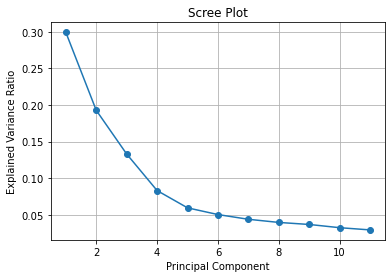

In [48]:
selected_columns = df.iloc[:, 0:11]

fp = (selected_columns == "Yes").astype(int)

# Perform Principal Component Analysis (PCA)
pca = PCA()
pca.fit(fp)

# Summary of PCA results
standard_deviations = np.sqrt(pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
sdev =[]

# Print explained variance ratio and cumulative explained variance
for std_dev in standard_deviations:
    sdev.append(round(std_dev,4))

print("Standard Deviation: ")
print(sdev)
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

# Create a scree plot to visualize explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [49]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

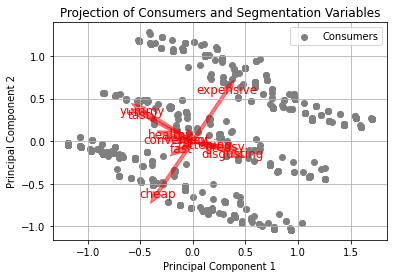

In [52]:
# Rotate and project data into the first two principal components
projected_data = pca.transform(fp)

# Create a scatter plot of the projected data (in grey)
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey', label='Consumers')

# Add arrows for the rotated and projected original segmentation variables
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5, width=0.03)
    plt.text(comp1, comp2, fp.columns[i], color='r', fontsize=12, ha='center', va='center')

# Set axis labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Set plot title
plt.title("Projection of Consumers and Segmentation Variables")
# Show the plot
plt.grid(True)
plt.legend()
plt.show()
     

In [66]:
df_eleven = df.loc[:,col]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [68]:
a = df.loc[:,col].values
a

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

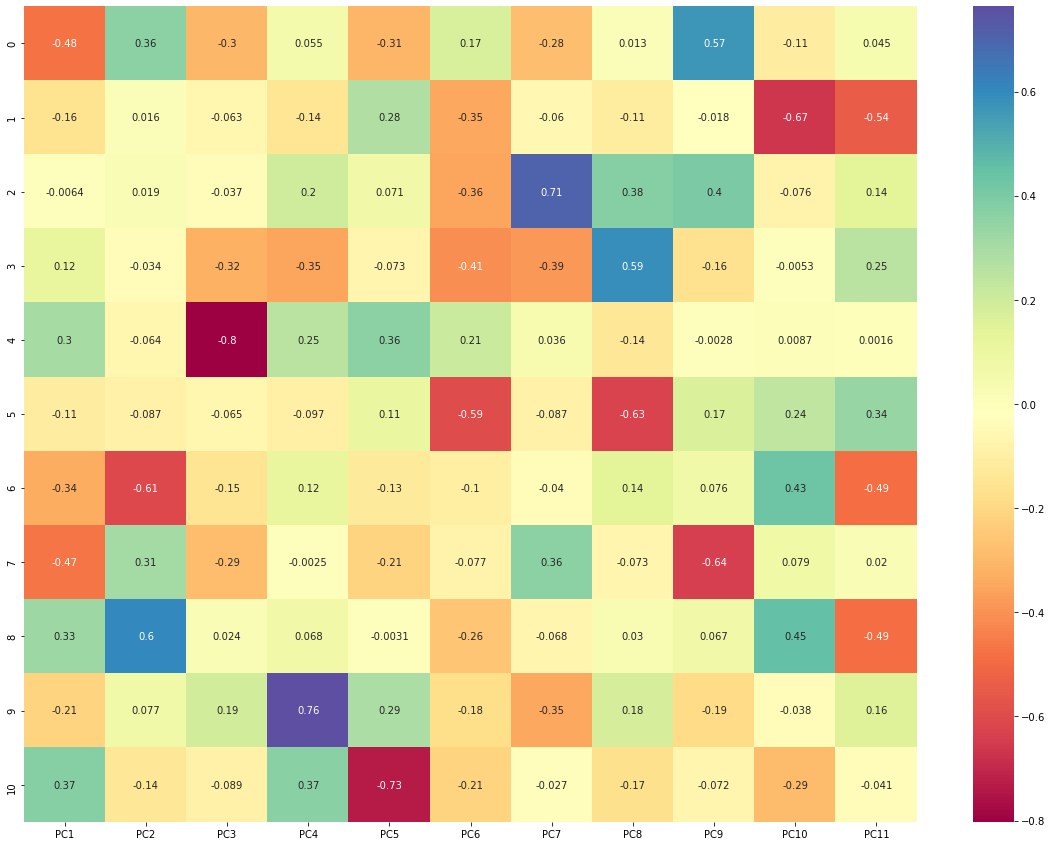

In [72]:
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

# EXPLORATORY DATA ANALYSIS

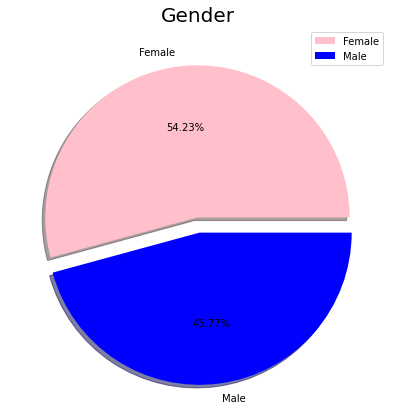

In [99]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<b>Observation :</b> From above Graphical Representation we can see that the density of female customer is hhigher than Male Customer

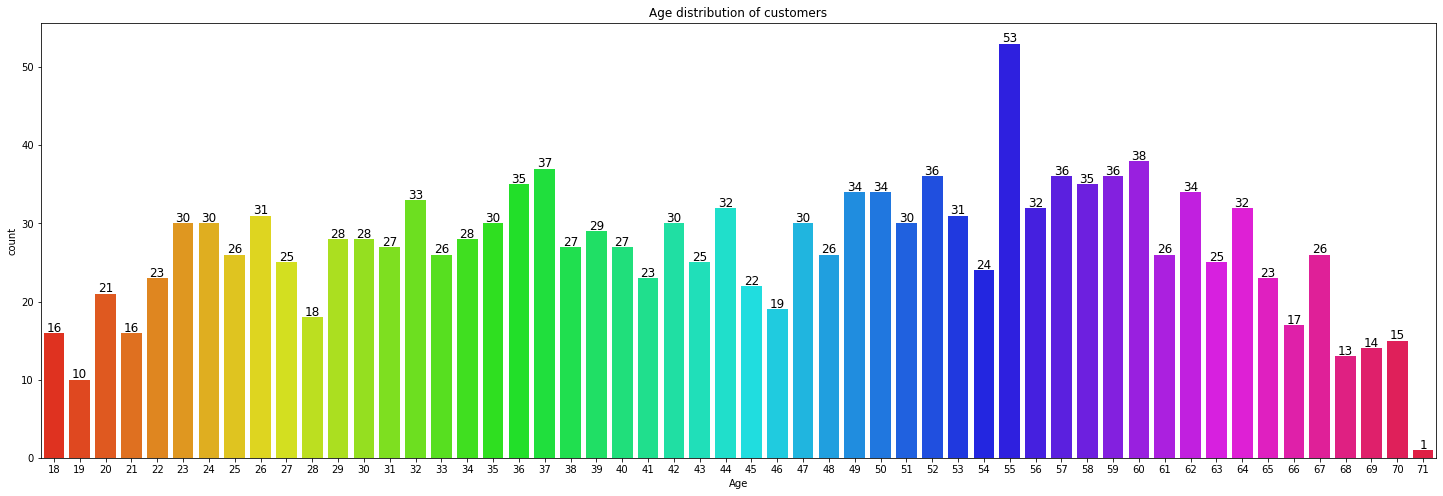

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (25, 8)

# Create a countplot for the 'Age' column in your DataFrame
ax = sns.countplot(x=df['Age'], palette='hsv')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title
plt.title('Age distribution of customers')

# Show the plot
plt.show()


<b>Observation :</B> From abouve graphical representation we can see that the customer are more  between 50 to 60.

In [113]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

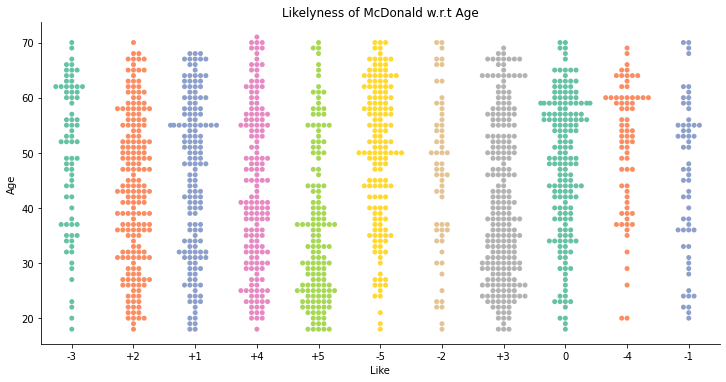

In [115]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

# Histogram

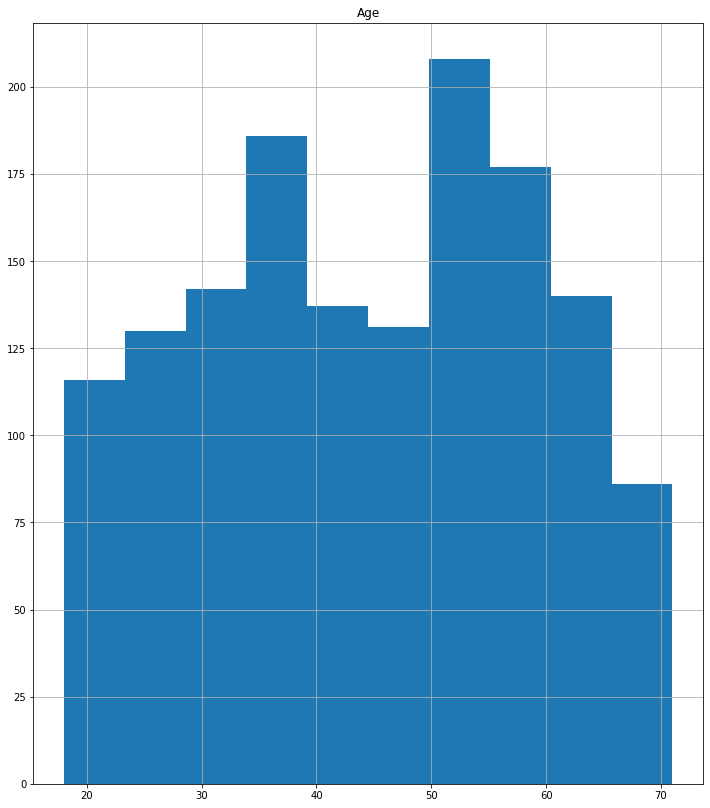

In [116]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [124]:
import numpy as np
import pandas as pd

# Replace 'No' with NaN in the entire DataFrame (assuming df is your DataFrame)
df = df.replace('No', np.nan)

# Now, 'No' values are replaced with NaN, which is a suitable placeholder for missing data.


# Marking Segments

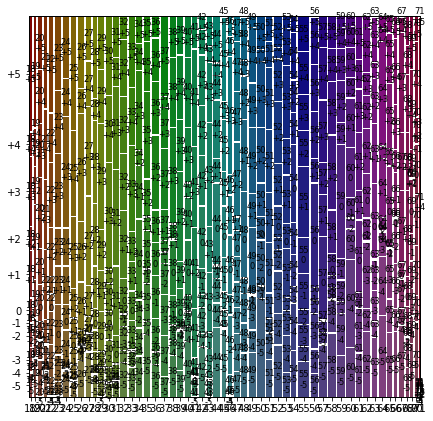

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
Age,,,,,,,,,,,
18,1,0,1,1,0,1,2,1,3,1,5
19,1,0,0,1,0,1,2,1,1,0,3
20,0,2,1,0,1,2,2,4,3,3,3
21,1,0,0,0,1,0,1,3,3,3,4
22,0,0,1,2,2,1,1,3,4,3,6
23,0,0,1,2,0,4,3,3,6,5,6
24,2,0,0,0,3,2,3,3,9,3,5
25,1,0,0,1,1,1,1,2,5,6,8
26,3,1,0,0,0,1,4,5,9,2,6


None

In [131]:
from statsmodels.graphics.mosaicplot import mosaic

crosstab = pd.crosstab(df['Age'], df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

<AxesSubplot:xlabel='healthy', ylabel='Age'>

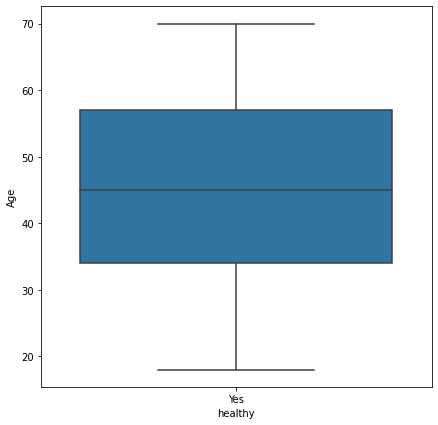

In [132]:
sns.boxplot(x="healthy", y="Age", data=df)

In [135]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('Gender')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Gender,VisitFrequency
0,Female,2.663706
1,Male,2.607519


In [136]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('Gender')['Like'].mean()
Like = Like.to_frame().reset_index()
Like
     

,Gender,Like
0,Female,4.350254
1,Male,4.586466


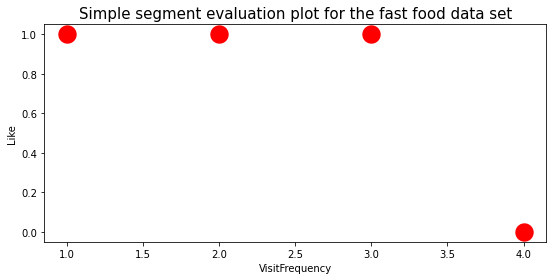

In [146]:
# Sample data representing different market segments
data = {
    'cluster_num': [0, 1, 2, 3],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Like': [True, False, True, True],
    'VisitFrequency': [2, 4, 1, 3]
}
#Create DataFrames to store the sample data
Gender = pd.DataFrame(data)
Like = pd.DataFrame(data)
visit = pd.DataFrame(data)

# Merge the DataFrames based on the 'cluster_num' column
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Create a scatter plot to visualize market segment characteristics
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)
plt.show()
